Simulation experiments for the Misspecification of Domain Generalization Benchmarks

In [50]:
import builtins
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [51]:
%load_ext autoreload
%autoreload 2

# Define experimental constants as global variables
builtins.n_samples = 500
builtins.n_plot_samples = 100
builtins.n_features = 2
builtins.mu_c = np.array([1, 1])
builtins.mu_e = np.array([1, 1])
builtins.Sigma_c = np.array([[1, 0.0], [0.0, 1]])
builtins.Sigma_e = np.array([[1, 0.0], [0.0, 1]])

builtins.p_y1 = 0.5
builtins.p_noise = 0.25

builtins.n_Ms = 50

from utils import (
generate_Ms,
generate_distribution,
generate_mixture_distribution,
train_and_test_model,
get_inner_product,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Gaussian Spurious Features

In [52]:
# Sample M's which define distributions P_M(X=[Z_dg, Z_spu], Y)
Ms = [np.eye(n_features)] + generate_Ms(n_features, n_Ms)

In [53]:
# Generate distributions
source_distribution = generate_distribution() # defaults to mu_dg = mu_spu = 1, Cov_dg = Cov_spu = I.
target_distributions = [generate_distribution(M) for M in Ms]

In [54]:
# Get (X, Y) pairs
target_data = [(d['X'], d['Y']) for d in target_distributions]
dg_target_data = [(d['Zc'], d['Y']) for d in target_distributions]

source_clf, target_domains_accuracy_scores = train_and_test_model(source_distribution['X'], source_distribution['Y'], target_data)
_, dg_target_domains_accuracy_scores = train_and_test_model(source_distribution['Zc'], source_distribution['Y'], dg_target_data)

In [55]:
inner_products = [get_inner_product(M, source_clf) for M in Ms]

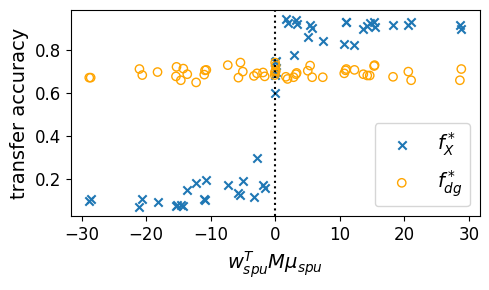

In [56]:
plt.figure(figsize=(5, 3))

# Theorem 1 Condition
cond = [np.abs(i[0]) >= i[1] for i in inner_products]  # Example condition based on inner products

# Separate the points based on the condition for `res`
plt.scatter([i[0] for i in inner_products], target_domains_accuracy_scores, marker='x', label=r'$f_{X}^*$',)

# Single scatter plot for `dg_res`
plt.scatter([i[0] for i in inner_products], dg_target_domains_accuracy_scores, marker='o', facecolors='none', edgecolors='orange', label=r'$f_{dg}^*$')

plt.axvline(0, linestyle=':', color='black')
plt.xlabel(r'$w_{spu}^TM\mu_{spu}$', fontsize=14)
plt.ylabel('transfer accuracy', fontsize=14)
plt.legend(fontsize=14)
rcParams['xtick.labelsize'] = 12  # Set x-tick font size to 12
rcParams['ytick.labelsize'] = 12  # Set y-tick font size to 12
plt.tight_layout()


plt.savefig('guassian_sim.pdf', format='pdf', dpi=300)


# Sub-Gaussian Spurious Features

## Extrapolation

In [57]:
INCLUDE_ND = False # Extrapolation

train_Ms = generate_Ms(n_features, 4, include_nd=INCLUDE_ND)
Ms = generate_Ms(n_features, n_Ms)

source_distribution = generate_mixture_distribution(train_Ms)
target_distributions = [generate_distribution(M) for M in Ms]

In [58]:
target_data = [(d['X'], d['Y']) for d in target_distributions]
dg_target_data = [(d['Zc'], d['Y']) for d in target_distributions]
source_clf, target_domains_accuracy_scores = train_and_test_model(source_distribution['X'], source_distribution['Y'], target_data)
_, dg_target_domains_accuracy_scores = train_and_test_model(source_distribution['Zc'], source_distribution['Y'], dg_target_data)

In [59]:
inner_products = [get_inner_product(M, source_clf) for M in Ms]

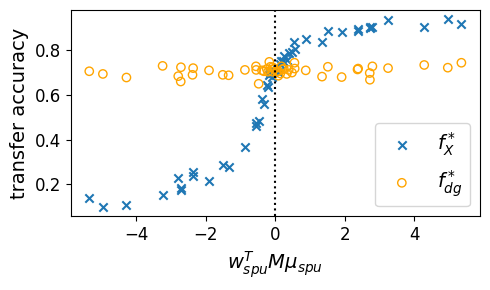

In [60]:
plt.figure(figsize=(5, 3))

# Theorem 1 Condition
cond = [np.abs(i[0]) >= i[1] for i in inner_products]  # Example condition based on inner products

# Separate the points based on the condition for `res`
plt.scatter([i[0] for i in inner_products], target_domains_accuracy_scores, marker='x', label=r'$f_{X}^*$',)

# Single scatter plot for `dg_res`
plt.scatter([i[0] for i in inner_products], dg_target_domains_accuracy_scores, marker='o', facecolors='none', edgecolors='orange', label=r'$f_{dg}^*$')

plt.axvline(0, linestyle=':', color='black')
plt.xlabel(r'$w_{spu}^TM\mu_{spu}$', fontsize=14)
plt.ylabel('transfer accuracy', fontsize=14)
plt.legend(fontsize=14)
rcParams['xtick.labelsize'] = 12  # Set x-tick font size to 12
rcParams['ytick.labelsize'] = 12  # Set y-tick font size to 12
plt.tight_layout()


plt.savefig('extrapolation_subgaussian_sim.pdf', format='pdf', dpi=300)


## Interpolation

In [61]:
INCLUDE_ND = True # Interpolation

train_Ms = generate_Ms(n_features, 4, include_nd=INCLUDE_ND)
Ms = generate_Ms(n_features, n_Ms)

source_distribution = generate_mixture_distribution(train_Ms)
target_distributions = [generate_distribution(M) for M in Ms]

In [62]:
target_data = [(d['X'], d['Y']) for d in target_distributions]
dg_target_data = [(d['Zc'], d['Y']) for d in target_distributions]
source_clf, target_domains_accuracy_scores = train_and_test_model(source_distribution['X'], source_distribution['Y'], target_data)
_, dg_target_domains_accuracy_scores = train_and_test_model(source_distribution['Zc'], source_distribution['Y'], dg_target_data)

In [63]:
inner_products = [get_inner_product(M, source_clf) for M in Ms]

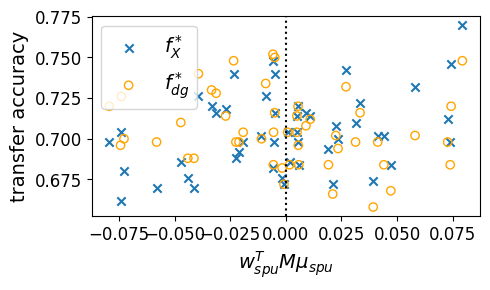

In [64]:
plt.figure(figsize=(5, 3))

# Theorem 1 Condition
cond = [np.abs(i[0]) >= i[1] for i in inner_products]  # Example condition based on inner products

# Separate the points based on the condition for `res`
plt.scatter([i[0] for i in inner_products], target_domains_accuracy_scores, marker='x', label=r'$f_{X}^*$',)

# Single scatter plot for `dg_res`
plt.scatter([i[0] for i in inner_products], dg_target_domains_accuracy_scores, marker='o', facecolors='none', edgecolors='orange', label=r'$f_{dg}^*$')

plt.axvline(0, linestyle=':', color='black')
plt.xlabel(r'$w_{spu}^TM\mu_{spu}$', fontsize=14)
plt.ylabel('transfer accuracy', fontsize=14)
plt.legend(fontsize=14)
rcParams['xtick.labelsize'] = 12  # Set x-tick font size to 12
rcParams['ytick.labelsize'] = 12  # Set y-tick font size to 12
plt.tight_layout()


plt.savefig('interpolation_subgaussian_sim.pdf', format='pdf', dpi=300)
